Veamos cómo se mezclan los géneros


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
plt.style.use('dark_background')

<h3>El reto con respecto a otros EDAs sobre el tema es analizar la mezcla de géneros simultáneos</h3>

In [4]:
terror = pd.read_csv("../data/pelis_terror.csv")
generos = pd.read_csv("../data/genres_list.csv")

In [5]:
terror = terror.iloc[:,2:]

Comprobamos que no haya nulos

In [6]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   id                 10000 non-null  int64  
 2   poster_path        9823 non-null   object 
 3   adult              10000 non-null  bool   
 4   overview           6075 non-null   object 
 5   release_date       10000 non-null  object 
 6   genre_ids          10000 non-null  object 
 7   original_title     10000 non-null  object 
 8   original_language  10000 non-null  object 
 9   title              10000 non-null  object 
 10  backdrop_path      7740 non-null   object 
 11  popularity         10000 non-null  float64
 12  vote_count         10000 non-null  int64  
 13  video              10000 non-null  bool   
 14  vote_average       10000 non-null  float64
 15  media_type         10000 non-null  object 
 16  budget             1000

Elimino las columnas con nulos que no me aportan informacion para el modelo


In [7]:
terror.drop(["overview", "backdrop_path", "spoken_languagess"], axis=1)
terror.set_index("id")

,Unnamed: 0,poster_path,adult,overview,release_date,genre_ids,original_title,original_language,title,backdrop_path,popularity,vote_count,video,vote_average,media_type,budget,duration,revenues,spoken_languagess
id,,,,,,,,,,,,,,,,,,,
758323,0,/qcknZEeD71byJ3XSalDDZ5iHpNr.jpg,False,"Película sobre Gabriele Amorth, un sacerdote q...",2023-04-14,"[27, 53]",The Pope's Exorcist,en,El exorcista del papa,/5Y5pz0NX7SZS9036I733F7uNcwK.jpg,1630.483,90,False,6.7,movie,18000000,103,36000000,"{'english_name': 'English', 'iso_639_1': 'en',..."
980078,1,/ZmbSkGEpXFufbDhgfTnSrFAguo.jpg,False,Christopher Robin se dirige a la universidad y...,2023-02-15,"[27, 53]",Winnie the Pooh: Blood and Honey,en,Winnie the Pooh: Blood and Honey,/wD2kUCX1Bb6oeIb2uz7kbdfLP6k.jpg,996.295,464,False,5.8,movie,100000,84,3200000,"{'english_name': 'English', 'iso_639_1': 'en',..."
1084225,2,/hR1jdCw0A9czgsbp45TASkjjBhA.jpg,False,NaN,2023-03-02,"[28, 18, 27, 878, 53]",The Park,en,The Park,/sgFDQwJTYMuUS7Ng4PAPB8nBf2j.jpg,923.037,30,False,5.8,movie,0,80,0,"{'english_name': 'English', 'iso_639_1': 'en',..."
984105,3,/cphIfZ7FYXib0Y4ZZ2cTv4Q3jAt.jpg,False,"Cuando un infame sarcófago egipcio ""maldito"" c...",2023-01-10,[27],The Mummy Resurrection,en,The Mummy Resurrection,/o6PcqdeWMhvDGSkbzgKNfnzd2Js.jpg,703.369,6,False,6.2,movie,0,85,0,"{'english_name': 'English', 'iso_639_1': 'en',..."
631842,4,/4Zna9CvyzaAgejsErmyXmHC64Dd.jpg,False,Durante unas vacaciones en una cabaña en un bo...,2023-02-03,"[27, 9648, 53]",Knock at the Cabin,en,Llaman a la puerta,/zM9RGbJBZ3UNpFOabcRqh0iVAYP.jpg,687.168,1283,False,6.4,movie,20000000,100,52000000,"{'english_name': 'English', 'iso_639_1': 'en',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628959,9995,/cAhJi03mtZAEq0IC6yK2BdirHBB.jpg,False,NaN,2019-10-05,[27],Lady Belladonna's Tales From The Inferno,en,Lady Belladonna's Tales From The Inferno,NaN,0.840,2,False,6.5,movie,0,93,0,NaN
627132,9996,/cZW9GfXBb4cWj53cpnfTsqqclH3.jpg,False,NaN,2012-10-30,"[27, 53]",Fade Into You,en,Fade Into You,/cQ4syIiqheULjeBpGSZdmXRRl0V.jpg,0.864,5,False,5.6,movie,0,13,0,"{'english_name': 'English', 'iso_639_1': 'en',..."
623670,9997,/fk4eaKL5ilNY4x2PFrievUW7obf.jpg,False,NaN,2018-06-25,"[27, 878]",Hippopotamus,en,Hippopotamus,/2MTVkmZeHUzDlYrHPPyWQtRZepR.jpg,1.530,2,False,1.0,movie,0,15,0,"{'english_name': 'English', 'iso_639_1': 'en',..."


In [8]:
terror.describe()

,Unnamed: 0,id,popularity,vote_count,vote_average,budget,duration,revenues
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04
mean,4999.50000,3.003216e+05,8.423313,209.941200,4.868080,1.664023e+06,85.078300,4.389338e+06
std,2886.89568,3.124768e+05,31.470818,782.408266,1.746441,7.683283e+06,24.755097,2.588010e+07
min,0.00000,1.700000e+01,0.840000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2499.75000,3.696375e+04,2.125750,7.000000,4.100000,0.000000e+00,81.000000,0.000000e+00
50%,4999.50000,1.456340e+05,3.566000,23.000000,5.100000,0.000000e+00,89.000000,0.000000e+00
75%,7499.25000,5.117618e+05,7.692000,87.000000,6.000000,2.000000e+03,95.000000,0.000000e+00
max,9999.00000,1.114867e+06,1630.483000,17501.000000,10.000000,2.000000e+08,608.000000,7.018426e+08


Tratamos la columna con los géneros a los que pertenece para que sea más fácil de tratar después

In [9]:
terror["genre_list"] = terror["genre_ids"].apply(lambda x: x.replace("[", "").replace("]", "").replace(" ", ""))

In [10]:
terror["genre_list"] = terror["genre_list"].apply(lambda x: x.split(","))

Creamos una columna que nos indicará si la película contiene terror/comedia, que es el target, la hacemos numérica

In [11]:
terror["is_terror_comedia"] = [set(["27", "53"]).issubset(x) for x in terror["genre_list"]]

In [12]:
terror["is_terror_comedia"] = terror["is_terror_comedia"].astype(int)

In [13]:
terror["genre_ids"] = terror["genre_ids"].apply(lambda x: x.replace("[", "").replace("]", "").replace(" ", "").replace(",","-"))

Incluimos la cantidad de veces que aparece un género

In [14]:
val_counts = terror.genre_ids.value_counts()
type(val_counts)
val_counts

27                       2571
27-53                    1068
35-27                     435
27-878                    378
27-35                     312
                         ... 
10770-9648-27               1
10770-10751-27-35           1
27-35-12-10770              1
28-35-878-27-10770-12       1
18-14-36-27-10770           1
Name: genre_ids, Length: 1145, dtype: int64

In [15]:
terror["val_count"] = [x for x in val_counts[terror["genre_ids"]]]


Esta columna nos ayudará a agrupar las combinaciones de subgéneros por la frecuancia con la que aparecen

Elimino las películas cuya combinación de géneros aparece sólo una vez

In [16]:
terror = terror[terror["val_count"]>1]

In [17]:
q1 = np.quantile(terror["val_count"], .75)
q2 = np.quantile(terror["val_count"], .50)
q3 = np.quantile(terror["val_count"], .25)
q4 = np.quantile(terror["val_count"], .1)

In [18]:
terror["quantile"] = pd.cut(terror['val_count'], 4, labels=False, duplicates="drop")

<AxesSubplot: xlabel='quantile', ylabel='Count'>

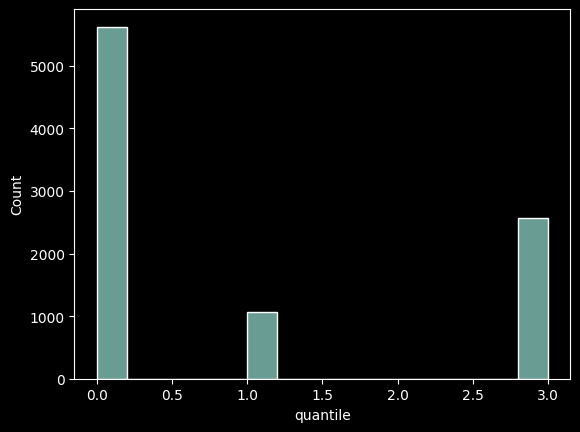

In [19]:
sns.histplot(terror["quantile"])

Aquí un par de funciones que serán útiles para visualizar el nombre de los géneros

In [20]:
generos_dict = generos.to_dict("records")

In [21]:
#renombrar generos

def getName(n):
    for i in generos_dict:        
        if int(n) == int(i["id"]):           
            return i["name"]       
#res = list(map(lambda ids: getName(ids), dfTerrorGenresConcat.columns[LAST_INDEX:]))


In [22]:
def getLabels(n):        
    r = ""       
    for i in n:
        r = r + getName(i) + "-"            
    return r
#res = [getLabels(x) for x in dfTerrorGenres.genre_list.value_counts().index.to_list()]
#print(res)


## Características de Braindead: tu madre se ha comido a mi perro

In [23]:
braindead = terror[terror["title"] == "Braindead: tu madre se ha comido a mi perro" ]
braindead

,Unnamed: 0,id,poster_path,adult,overview,release_date,genre_ids,original_title,original_language,title,...,vote_average,media_type,budget,duration,revenues,spoken_languagess,genre_list,is_terror_comedia,val_count,quantile
345,345,763,/wQzk8FqofDXlQbAUoxQHN7xifi8.jpg,False,Un científico descubre en Skull Island un ejem...,1993-02-12,27-35,Braindead,en,Braindead: tu madre se ha comido a mi perro,...,7.4,movie,3000000,103,242623,"{'english_name': 'English', 'iso_639_1': 'en',...","[27, 35]",0,312,0


In [24]:
test_val = pd.DataFrame(braindead)

In [25]:
test_val.to_csv("../data/valor_target.csv")

Guardo la fila para usarla con los modelos de predicción

<b>Buscamos películas pertenecientes a los géneros terror y comedia para construir nuestro modelo</b>

Formateamos la columna con la fecha de estreno

In [26]:
terror.release_date = pd.to_datetime(terror.release_date)

Aquí las películas que contienen los dos géneros a los que pertenece Braindead: tu madre se ha comido a mi perro

In [27]:
same_genres = terror[terror["is_terror_comedia"]==1]


In [28]:
same_genres.genre_list

0                    [27, 53]
1                    [27, 53]
2       [28, 18, 27, 878, 53]
4              [27, 9648, 53]
5                    [27, 53]
                ...          
9927             [18, 27, 53]
9946                 [27, 53]
9948      [27, 878, 53, 9648]
9957                 [27, 53]
9996                 [27, 53]
Name: genre_list, Length: 3276, dtype: object

In [29]:
len(same_genres.genre_ids.unique())

174

Existen demasiadas combinaciones diferentes de géneros que contienen Terror-Comedia, vamos a filtrar un poco para visualizar mejor

In [30]:
same_genres = same_genres.loc[(same_genres["release_date"].dt.year > 1965) & (same_genres["popularity"] > 20) & (same_genres["val_count"] > 10)]

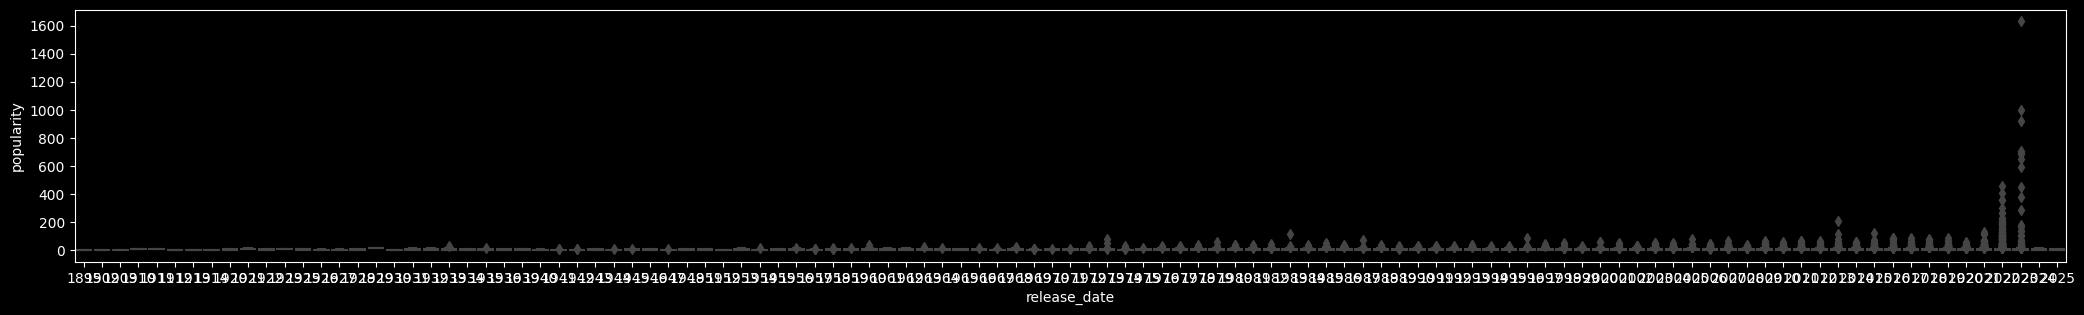

In [31]:
a3_dims = (25.7, 3.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.boxplot(data=terror, x=terror.release_date.dt.year, y="popularity");

Miramos los outliers


In [32]:
terror = terror[terror.popularity < 500]

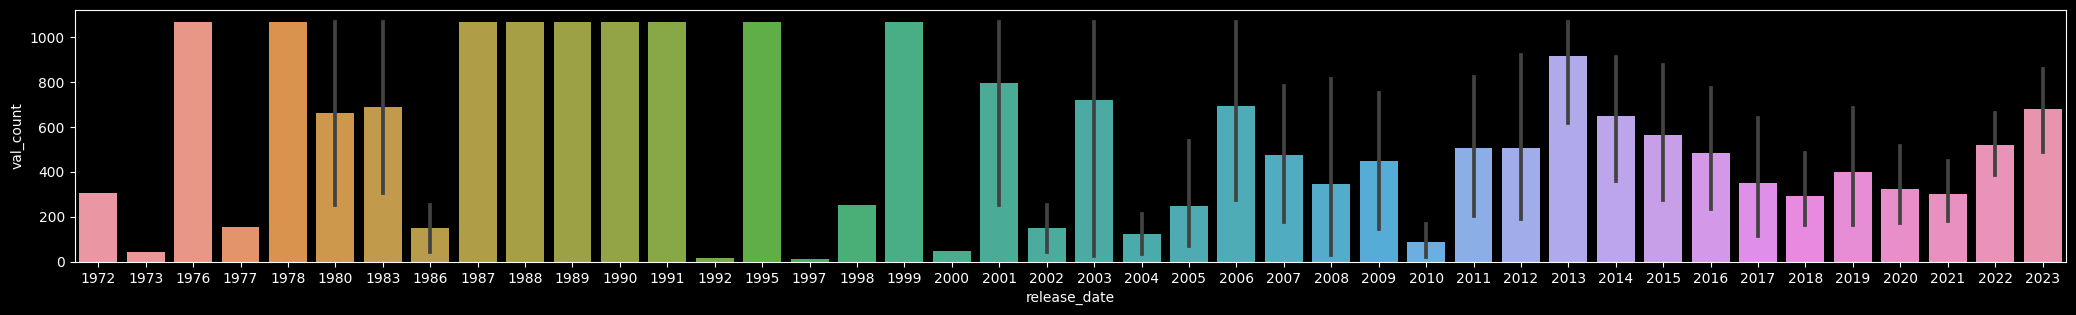

In [33]:
a3_dims = (25.7, 3.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(data=same_genres, x=same_genres.release_date.dt.year, y="val_count");

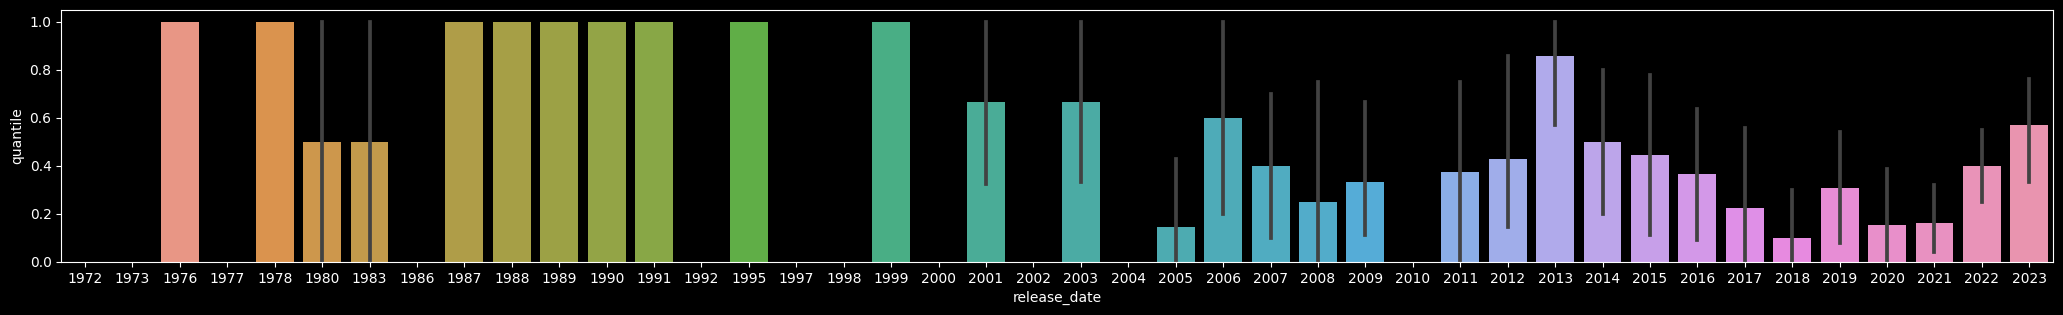

In [34]:
a3_dims = (25.7, 3.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(data=same_genres, x=same_genres.release_date.dt.year, y="quantile");

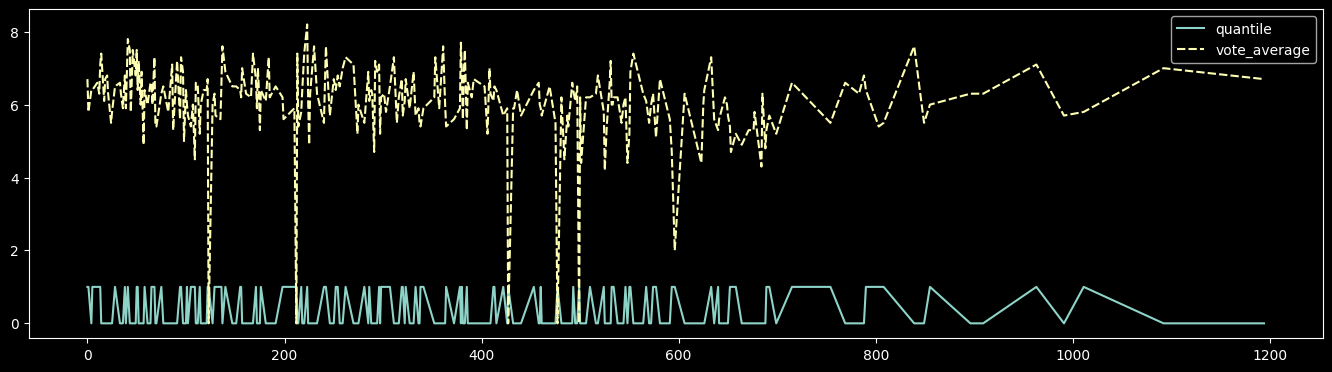

In [35]:
a3_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a3_dims)
#elimino M3GAN, que sería un outlier
filter_same = same_genres.loc[(same_genres["release_date"].dt.year > 1965) & (same_genres["popularity"] > 20)]
filter_same.drop(filter_same[filter_same["title"] == "M3GAN"].index, inplace=True)
#sns.boxplot(data=filter_same, x=filter_same.release_date.dt.year, y="popularity")
sns.lineplot(data=filter_same[[ "quantile", "vote_average"]]);

El pico de género Terror-Comedia está en los 90 y algo en los primeros 2000

<AxesSubplot: xlabel='release_date', ylabel='popularity'>

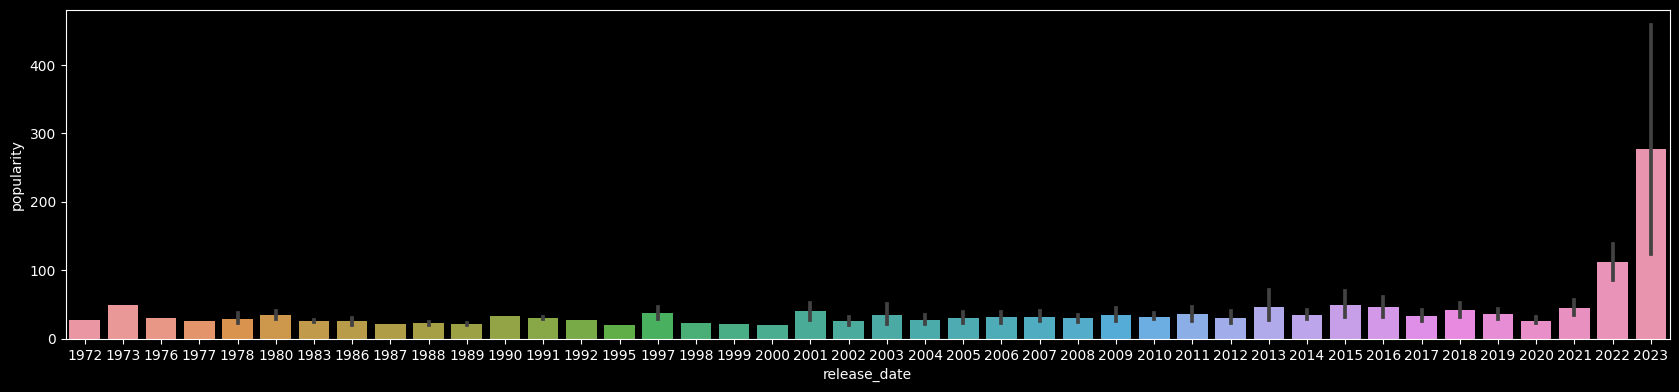

In [36]:
a3_dims = (20.7, 4.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(data=same_genres, x=same_genres.release_date.dt.year, y="popularity")

<AxesSubplot: xlabel='release_date', ylabel='vote_count'>

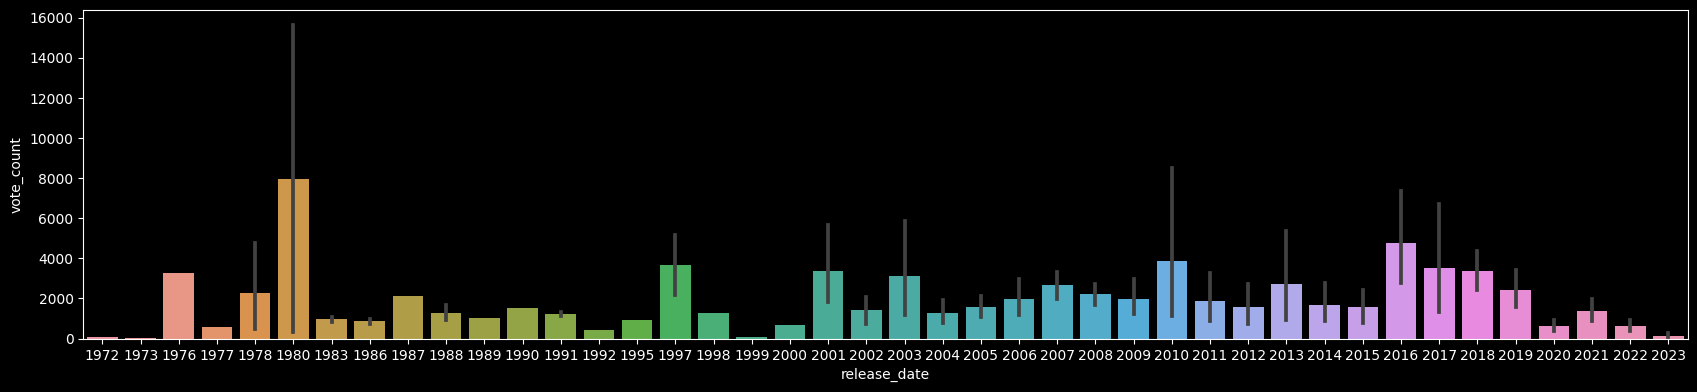

In [37]:
a3_dims = (20.7, 4.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(data=same_genres, x=same_genres.release_date.dt.year, y="vote_count")

In [38]:
same_genres[same_genres.val_count>30].val_count.value_counts()

1068    99
254     43
307     24
112     21
41      17
153      7
45       6
33       5
101      5
36       3
39       3
62       2
48       1
Name: val_count, dtype: int64

In [39]:
same_genres.shape

(265, 24)

In [40]:
#same_genres[same_genres["release_date"].dt.year.isin([1984, 1990,1993,2014,2022]) ].title.to_list()

In [41]:
#same_genres[same_genres["release_date"].dt.year.isin([2022]) ]

Parece que cada vez se mezclan más generos

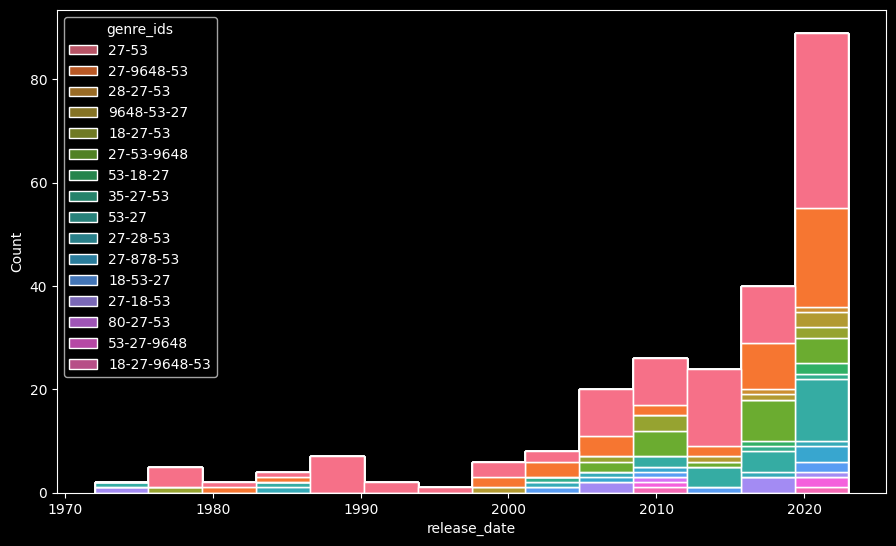

In [42]:
a3_dims = (10.7, 6.27)
fig, ax = plt.subplots(figsize=a3_dims)
for ix,gen in generos.iterrows():
    n = gen["name"]
    sns.histplot(data=same_genres[same_genres.val_count>30], x=same_genres[same_genres.val_count>30].release_date.dt.year,  multiple = 'stack', hue="genre_ids")

Podríamos filtrar películas con pocas apariciones

In [43]:
dfTerrorClean = terror[terror.val_count > 5]

Y películas anteriores al año 2000

In [44]:
dfTerrorClean = terror[terror.release_date.dt.year > 2000]

In [45]:
dfTerrorClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6691 entries, 9 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         6691 non-null   int64         
 1   id                 6691 non-null   int64         
 2   poster_path        6528 non-null   object        
 3   adult              6691 non-null   bool          
 4   overview           3643 non-null   object        
 5   release_date       6691 non-null   datetime64[ns]
 6   genre_ids          6691 non-null   object        
 7   original_title     6691 non-null   object        
 8   original_language  6691 non-null   object        
 9   title              6691 non-null   object        
 10  backdrop_path      4838 non-null   object        
 11  popularity         6691 non-null   float64       
 12  vote_count         6691 non-null   int64         
 13  video              6691 non-null   bool          
 14  vote_ave

In [46]:
# Obtener la serie con la frecuencia de cada valor en la columna 'color'
counts = dfTerrorClean["original_language"].value_counts()

# Seleccionar solo los valores que aparecen más de una vez
filtered_values = counts[counts > 20].index.tolist()

# Filtrar el dataframe en función de los valores seleccionados
dfTerrorClean = dfTerrorClean[dfTerrorClean['original_language'].isin(filtered_values)]


In [47]:
dfTerrorClean["original_language"].value_counts()

en    6158
es     108
ja      93
fr      66
de      40
it      27
no      21
Name: original_language, dtype: int64

In [48]:
pd.unique(dfTerrorClean["original_language"])

array(['en', 'es', 'no', 'ja', 'fr', 'it', 'de'], dtype=object)

In [49]:
dfTerrorClean.describe(include='all').loc['unique', :]

C:\Users\yporq\AppData\Local\Temp\ipykernel_12276\1859818835.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfTerrorClean.describe(include='all').loc['unique', :]


Unnamed: 0            NaN
id                    NaN
poster_path          6349
adult                   1
overview             3529
release_date         3493
genre_ids             380
original_title       6305
original_language       7
title                6363
backdrop_path        4677
popularity            NaN
vote_count            NaN
video                   1
vote_average          NaN
media_type              1
budget                NaN
duration              NaN
revenues              NaN
spoken_languagess      44
genre_list            380
is_terror_comedia     NaN
val_count             NaN
quantile              NaN
Name: unique, dtype: object

In [50]:

dfTerrorGenres = pd.DataFrame(data = {"id":dfTerrorClean.id, 
                                      "genres":dfTerrorClean.genre_ids, 
                                      "genre_list": dfTerrorClean.genre_list,
                                      "val_count":dfTerrorClean.val_count, 
                                      "release_date": dfTerrorClean.release_date,
                                       "original_language" : dfTerrorClean.original_language, 
                                       "title": dfTerrorClean.title, 
                                       "popularity" : dfTerrorClean.popularity, 
                                       "vote_count" : dfTerrorClean.vote_count, 
                                       "vote_average":dfTerrorClean.vote_average,
                                       "budget": dfTerrorClean.budget,
                                       "duration": dfTerrorClean.duration,
                                       "revenues": dfTerrorClean.revenues,
                                       "spoken_languagess": dfTerrorClean.spoken_languagess,
                                       "is_terror_comedia": dfTerrorClean.is_terror_comedia
                                       },
                                       columns=["id", "genres", "genre_list" ,"val_count","release_date", "original_language", "title", "popularity", "vote_count", 'vote_average', 'budget', 'duration', 'revenues', 'spoken_languagess', 'is_terror_comedia'])
dfTerrorGenres.tail()


,id,genres,genre_list,val_count,release_date,original_language,title,popularity,vote_count,vote_average,budget,duration,revenues,spoken_languagess,is_terror_comedia
9994,636900,27,[27],2571,2019-10-30,en,A Halloween Trick,1.034,2,3.0,0,14,0,"{'english_name': 'English', 'iso_639_1': 'en',...",0
9995,628959,27,[27],2571,2019-10-05,en,Lady Belladonna's Tales From The Inferno,0.840,2,6.5,0,93,0,NaN,0
9996,627132,27-53,"[27, 53]",1068,2012-10-30,en,Fade Into You,0.864,5,5.6,0,13,0,"{'english_name': 'English', 'iso_639_1': 'en',...",1
9997,623670,27-878,"[27, 878]",378,2018-06-25,en,Hippopotamus,1.530,2,1.0,0,15,0,"{'english_name': 'English', 'iso_639_1': 'en',...",0
9999,617208,27,[27],2571,2019-07-16,en,Charlotte: The Return,0.933,7,5.9,0,76,0,NaN,0


In [51]:
dfTerrorGenres = dfTerrorClean

In [52]:
dfTerrorGenres["quantile"] = [x for x in dfTerrorClean["quantile"]]

In [53]:
def count_labels(i_list_as_str):    
    return len(i_list_as_str)


In [54]:
dfTerrorGenres["count_labels"] = dfTerrorGenres["genre_list"].apply(count_labels)

In [55]:
dfTerrorGenres.columns

Index(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview', 'release_date',
       'genre_ids', 'original_title', 'original_language', 'title',
       'backdrop_path', 'popularity', 'vote_count', 'video', 'vote_average',
       'media_type', 'budget', 'duration', 'revenues', 'spoken_languagess',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels'],
      dtype='object')

In [56]:
LAST_INDEX=24

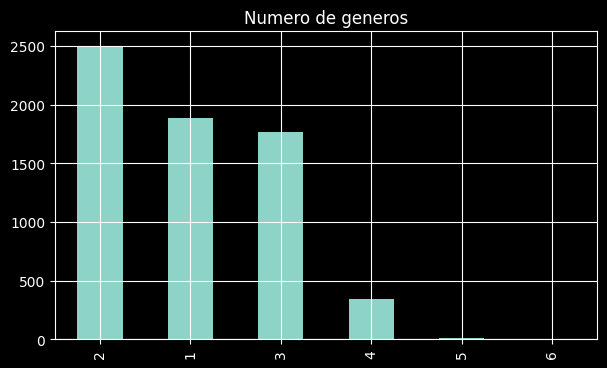

In [57]:
plt.figure(figsize=(7,4))
dfTerrorGenres.count_labels.value_counts().plot(kind='bar')
plt.title('Numero de generos')
plt.grid()
plt.show()

Si limpio el dataset al inicio, pierdo valores de culturas no mayoritarias, ainque son muy pocos porcentualmente ...

In [58]:

dfTerrorGenres.groupby(["original_language"])["original_language"].count().sort_values(ascending=False)

original_language
en    6158
es     108
ja      93
fr      66
de      40
it      27
no      21
Name: original_language, dtype: int64

In [59]:
y = [tuple(x.split("-")) for x in  dfTerrorGenres["genre_ids"]]
len(y)

6513

In [60]:
y = [tuple(x.split("-")) for x in  dfTerrorGenres["genre_ids"]]
len(y)
#aplicamos un MultiLabelBinarizer para manejas las combinaciones de categorias
#ya no lo hacemos, tenemos la columna target is_terror_comedia, pero lo usaré para la matriz de correlación

from sklearn.preprocessing import MultiLabelBinarizer


# Crear un objeto MultiLabelBinarizer y aplicarlo a la columna de géneros
mlb = MultiLabelBinarizer()

generos_encoded = mlb.fit_transform(y)
#generos_encoded_mini = mlb.fit_transform(miniDf['genre_list'] )

# Crear un DataFrame con las nuevas características
generos_df = pd.DataFrame(generos_encoded, columns=mlb.classes_)
print(mlb.classes_)

print(dfTerrorGenres.shape)


['10402' '10749' '10751' '10752' '10770' '12' '14' '16' '18' '27' '28'
 '35' '36' '37' '53' '80' '878' '9648' '99']
(6513, 25)


In [61]:
# Concatenar el DataFrame de productos codificados al DataFrame original

dfTerrorGenresConcat = pd.concat([dfTerrorGenres.reset_index(drop=True), generos_df.reset_index(drop=True)], axis=1)

print(len(generos_encoded))
dfTerrorGenresConcat.head()


6513


,Unnamed: 0,id,poster_path,adult,overview,release_date,genre_ids,original_title,original_language,title,...,27,28,35,36,37,53,80,878,9648,99
0,9,1011679,/v5CfpzxoJDkZxjZAizClFdlEF0U.jpg,False,"Hace décadas, la URSS desarrolló tiburones imp...",2022-08-12,28-878-53-27,Shark Side of the Moon,en,Shark Side of the Moon,...,1,1,0,0,0,1,0,1,0,0
1,10,884184,/yQTRmPzKAdLodknnPVtImm6FWPZ.jpg,False,Después del presunto suicidio de su hermano sa...,2023-02-10,27-53,Consecration,en,Consecration,...,1,0,0,0,0,1,0,0,0,0
2,11,988165,/5KmscR49WkmuPJKjmK4OUmsRn5C.jpg,False,Decidido a demostrar la posibilidad de dimensi...,2022-06-29,27,H.P. Lovecraft's Witch House,en,HP La casa de la bruja de Lovecraft,...,1,0,0,0,0,0,0,0,0,0
3,12,829410,/nBgxSimgLMGYCQckRQw7C2f7row.jpg,False,"Durante la pandemia, Parker y su mejor amigo d...",2022-09-24,27-53,Sick,en,Sick,...,1,0,0,0,0,1,0,0,0,0
4,13,676547,/hbtJK32km46jTmlvBXgR8SunfAp.jpg,False,"Una joven monja, la hermana Ann (Jacqueline By...",2022-10-28,27-53,Prey for the Devil,en,Reza por el diablo,...,1,0,0,0,0,1,0,0,0,0


In [62]:
dfTerrorGenres.columns

Index(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview', 'release_date',
       'genre_ids', 'original_title', 'original_language', 'title',
       'backdrop_path', 'popularity', 'vote_count', 'video', 'vote_average',
       'media_type', 'budget', 'duration', 'revenues', 'spoken_languagess',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels'],
      dtype='object')

In [63]:
idss = ['10402', '10749', '10770', '12',
       '14', '16', '18', '27', '28', '35', '37', '53', '80', '878', '9648',
       '99']

In [64]:
generos_dict = generos.to_dict("records")


In [65]:
dfTerrorGenresConcat.columns[dfTerrorGenresConcat.isnull().any()]

Index(['poster_path', 'overview', 'backdrop_path', 'spoken_languagess'], dtype='object')

In [66]:
dfTerrorGenresConcat['release_date']= pd.to_datetime(dfTerrorGenresConcat['release_date'])

In [67]:
LAST_INDEX = LAST_INDEX + 1

In [68]:
dfTerrorGenresConcat.drop(['poster_path', 'overview', 'backdrop_path', 'spoken_languagess'], axis=1)

,Unnamed: 0,id,adult,release_date,genre_ids,original_title,original_language,title,popularity,vote_count,...,27,28,35,36,37,53,80,878,9648,99
0,9,1011679,False,2022-08-12,28-878-53-27,Shark Side of the Moon,en,Shark Side of the Moon,456.059,117,...,1,1,0,0,0,1,0,1,0,0
1,10,884184,False,2023-02-10,27-53,Consecration,en,Consecration,451.660,29,...,1,0,0,0,0,1,0,0,0,0
2,11,988165,False,2022-06-29,27,H.P. Lovecraft's Witch House,en,HP La casa de la bruja de Lovecraft,406.610,12,...,1,0,0,0,0,0,0,0,0,0
3,12,829410,False,2022-09-24,27-53,Sick,en,Sick,358.328,126,...,1,0,0,0,0,1,0,0,0,0
4,13,676547,False,2022-10-28,27-53,Prey for the Devil,en,Reza por el diablo,357.880,612,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,9994,636900,False,2019-10-30,27,A Halloween Trick,en,A Halloween Trick,1.034,2,...,1,0,0,0,0,0,0,0,0,0
6509,9995,628959,False,2019-10-05,27,Lady Belladonna's Tales From The Inferno,en,Lady Belladonna's Tales From The Inferno,0.840,2,...,1,0,0,0,0,0,0,0,0,0
6510,9996,627132,False,2012-10-30,27-53,Fade Into You,en,Fade Into You,0.864,5,...,1,0,0,0,0,1,0,0,0,0
6511,9997,623670,False,2018-06-25,27-878,Hippopotamus,en,Hippopotamus,1.530,2,...,1,0,0,0,0,0,0,1,0,0


In [69]:
dfTerrorGenresConcat.columns

Index(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview', 'release_date',
       'genre_ids', 'original_title', 'original_language', 'title',
       'backdrop_path', 'popularity', 'vote_count', 'video', 'vote_average',
       'media_type', 'budget', 'duration', 'revenues', 'spoken_languagess',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels', '10402', '10749', '10751', '10752', '10770', '12', '14',
       '16', '18', '27', '28', '35', '36', '37', '53', '80', '878', '9648',
       '99'],
      dtype='object')

In [70]:
LAST_INDEX = 25

In [71]:
dfTerrorGenresConcat.columns[LAST_INDEX:]

Index(['10402', '10749', '10751', '10752', '10770', '12', '14', '16', '18',
       '27', '28', '35', '36', '37', '53', '80', '878', '9648', '99'],
      dtype='object')

In [72]:
#renombrar generos
    
res = list(map(lambda ids: getName(ids), dfTerrorGenresConcat.columns[LAST_INDEX:]))

print(res)


['Música', 'Romance', 'Familia', 'Bélica', 'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama', 'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense', 'Crimen', 'Ciencia ficción', 'Misterio', 'Documental']


In [73]:
dfTerrorGenres.genre_list.value_counts().index.to_list()

[['27'],
 ['27', '53'],
 ['35', '27'],
 ['53', '27'],
 ['27', '35'],
 ['27', '9648', '53'],
 ['27', '878'],
 ['18', '27', '53'],
 ['27', '9648'],
 ['27', '53', '9648'],
 ['18', '27'],
 ['27', '878', '53'],
 ['878', '27'],
 ['27', '18'],
 ['99', '27'],
 ['28', '27', '53'],
 ['27', '28'],
 ['28', '27'],
 ['27', '10770'],
 ['28', '27', '878'],
 ['27', '18', '53'],
 ['27', '14'],
 ['18', '53', '27'],
 ['35', '27', '878'],
 ['27', '28', '53'],
 ['53', '27', '9648'],
 ['14', '27'],
 ['80', '27', '53'],
 ['27', '53', '18'],
 ['35', '27', '53'],
 ['9648', '53', '27'],
 ['18', '27', '9648'],
 ['53', '18', '27'],
 ['18', '27', '9648', '53'],
 ['27', '53', '878'],
 ['28', '35', '27'],
 ['27', '53', '35'],
 ['18', '27', '878'],
 ['53', '27', '18'],
 ['9648', '27'],
 ['27', '80'],
 ['35', '14', '27'],
 ['27', '28', '35'],
 ['9648', '27', '53'],
 ['80', '27'],
 ['35', '18', '27'],
 ['27', '10749'],
 ['53', '27', '878'],
 ['27', '53', '10770'],
 ['18', '14', '27'],
 ['27', '878', '10770'],
 ['27', '5

In [74]:
def getLabels(n):        
    r = ""       
    for i in n:
        r = r + getName(i) + "-"            
    return r


res = [getName(x) for x in dfTerrorGenresConcat.columns[LAST_INDEX:]]
print(res)


['Música', 'Romance', 'Familia', 'Bélica', 'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama', 'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense', 'Crimen', 'Ciencia ficción', 'Misterio', 'Documental']


In [75]:
dfTerrorGenresConcat.columns

Index(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview', 'release_date',
       'genre_ids', 'original_title', 'original_language', 'title',
       'backdrop_path', 'popularity', 'vote_count', 'video', 'vote_average',
       'media_type', 'budget', 'duration', 'revenues', 'spoken_languagess',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels', '10402', '10749', '10751', '10752', '10770', '12', '14',
       '16', '18', '27', '28', '35', '36', '37', '53', '80', '878', '9648',
       '99'],
      dtype='object')

In [76]:
colsLabel = np.array(dfTerrorGenresConcat.columns[:LAST_INDEX])
colsLabel = np.append(colsLabel,res)
colsLabel.flatten()



array(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview',
       'release_date', 'genre_ids', 'original_title', 'original_language',
       'title', 'backdrop_path', 'popularity', 'vote_count', 'video',
       'vote_average', 'media_type', 'budget', 'duration', 'revenues',
       'spoken_languagess', 'genre_list', 'is_terror_comedia',
       'val_count', 'quantile', 'count_labels', 'Música', 'Romance',
       'Familia', 'Bélica', 'Película de TV', 'Aventura', 'Fantasía',
       'Animación', 'Drama', 'Terror', 'Acción', 'Comedia', 'Historia',
       'Western', 'Suspense', 'Crimen', 'Ciencia ficción', 'Misterio',
       'Documental'], dtype=object)

Compruebo que tengan el mismo número de features

In [77]:
len(colsLabel)

44

In [78]:
len(dfTerrorGenresConcat.columns)

44

Renombro columnas por legibilidad

In [79]:
dfTerrorGenresConcat.columns = colsLabel

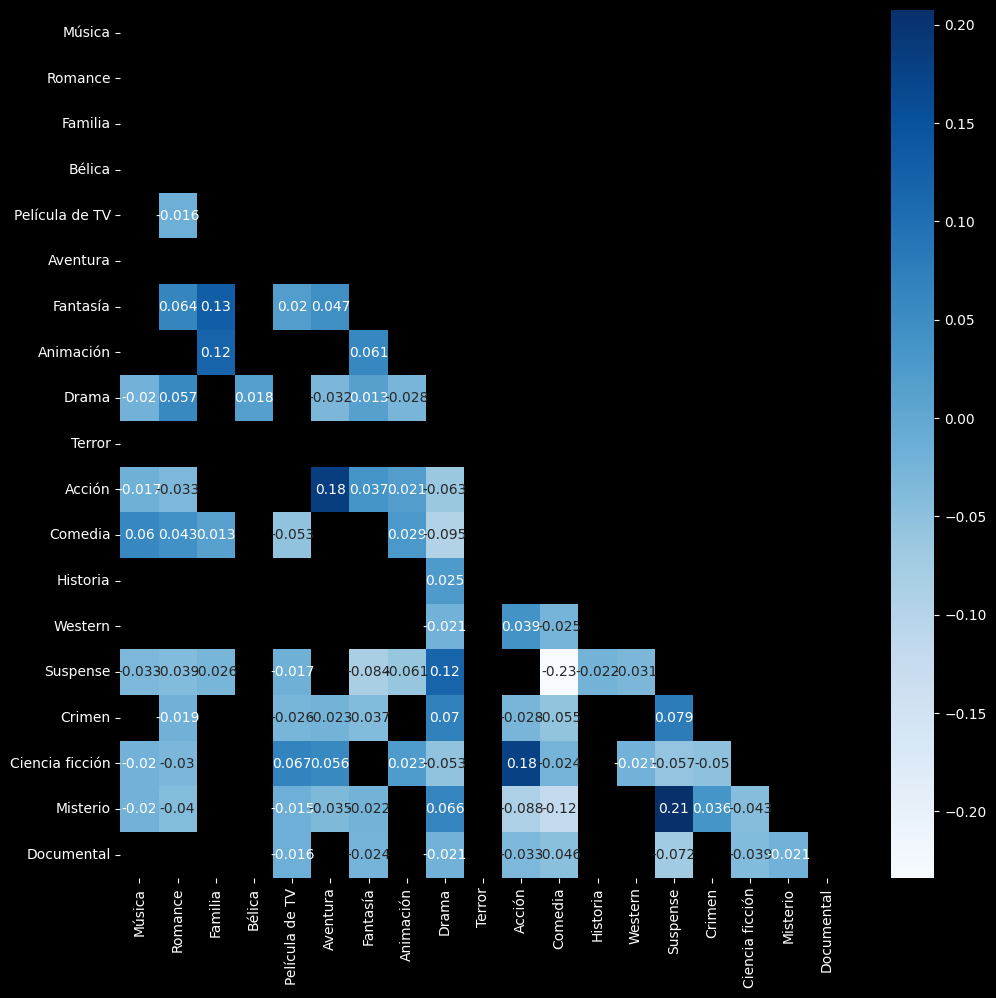

In [80]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 11.27)
dfCorr = dfTerrorGenresConcat.iloc[:,LAST_INDEX:].corr()
filteredDf = dfCorr[((dfCorr >= .0105) | (dfCorr <= -.015)) & (dfCorr !=1.000)]
fig, ax = plt.subplots(figsize=a4_dims)
matrix = np.triu(dfCorr)
sns.heatmap(filteredDf, annot=True, cmap="Blues", mask = matrix);

In [81]:
dfTerrorGenresConcat.iloc[:,LAST_INDEX:].corr().unstack().sort_values(ascending=False).drop_duplicates().to_csv("../data/corr_terror_genre_clean.csv")

In [82]:
dfCorrTerror = pd.DataFrame(dfTerrorGenresConcat.iloc[:,LAST_INDEX:].corr()[dfTerrorGenresConcat.iloc[:,LAST_INDEX:].corr().abs()>.0102].unstack().sort_values(ascending=False).drop_duplicates())
dfCorrTerror.loc["Comedia"]

,0
Animación,0.028975
Familia,0.012583
Historia,-0.011602
Ciencia ficción,-0.023650
Western,-0.024918
Documental,-0.046084


In [83]:
countGenres = pd.DataFrame(dfTerrorGenresConcat.iloc[:, LAST_INDEX:].sum().sort_values(ascending=False))

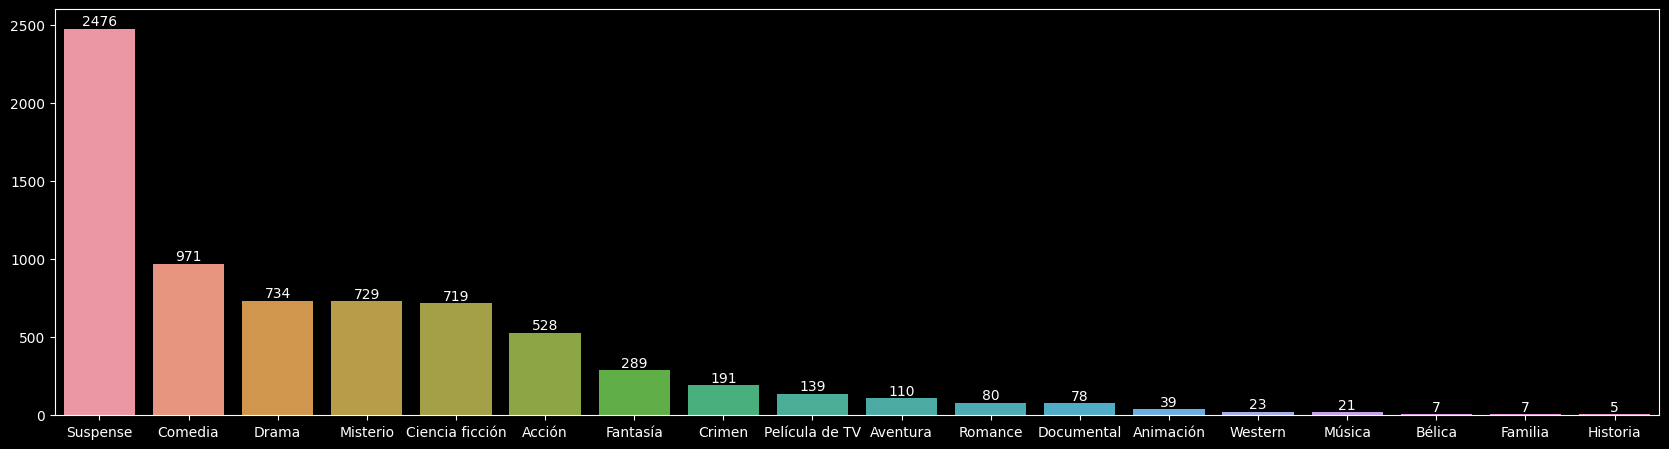

In [84]:
a3_dims = (20.7, 5.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(countGenres.drop("Terror").T )
for i in ax.containers:
    ax.bar_label(i,)

In [85]:
dfTerrorGenresConcat.columns

Index(['Unnamed: 0', 'id', 'poster_path', 'adult', 'overview', 'release_date',
       'genre_ids', 'original_title', 'original_language', 'title',
       'backdrop_path', 'popularity', 'vote_count', 'video', 'vote_average',
       'media_type', 'budget', 'duration', 'revenues', 'spoken_languagess',
       'genre_list', 'is_terror_comedia', 'val_count', 'quantile',
       'count_labels', 'Música', 'Romance', 'Familia', 'Bélica',
       'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama',
       'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense',
       'Crimen', 'Ciencia ficción', 'Misterio', 'Documental'],
      dtype='object')

In [86]:
dfTerrorGenresConcat.shape

(6513, 44)

In [87]:
dfTerrorGenresFilter = dfTerrorGenresConcat[dfTerrorGenresConcat["val_count"] >10]


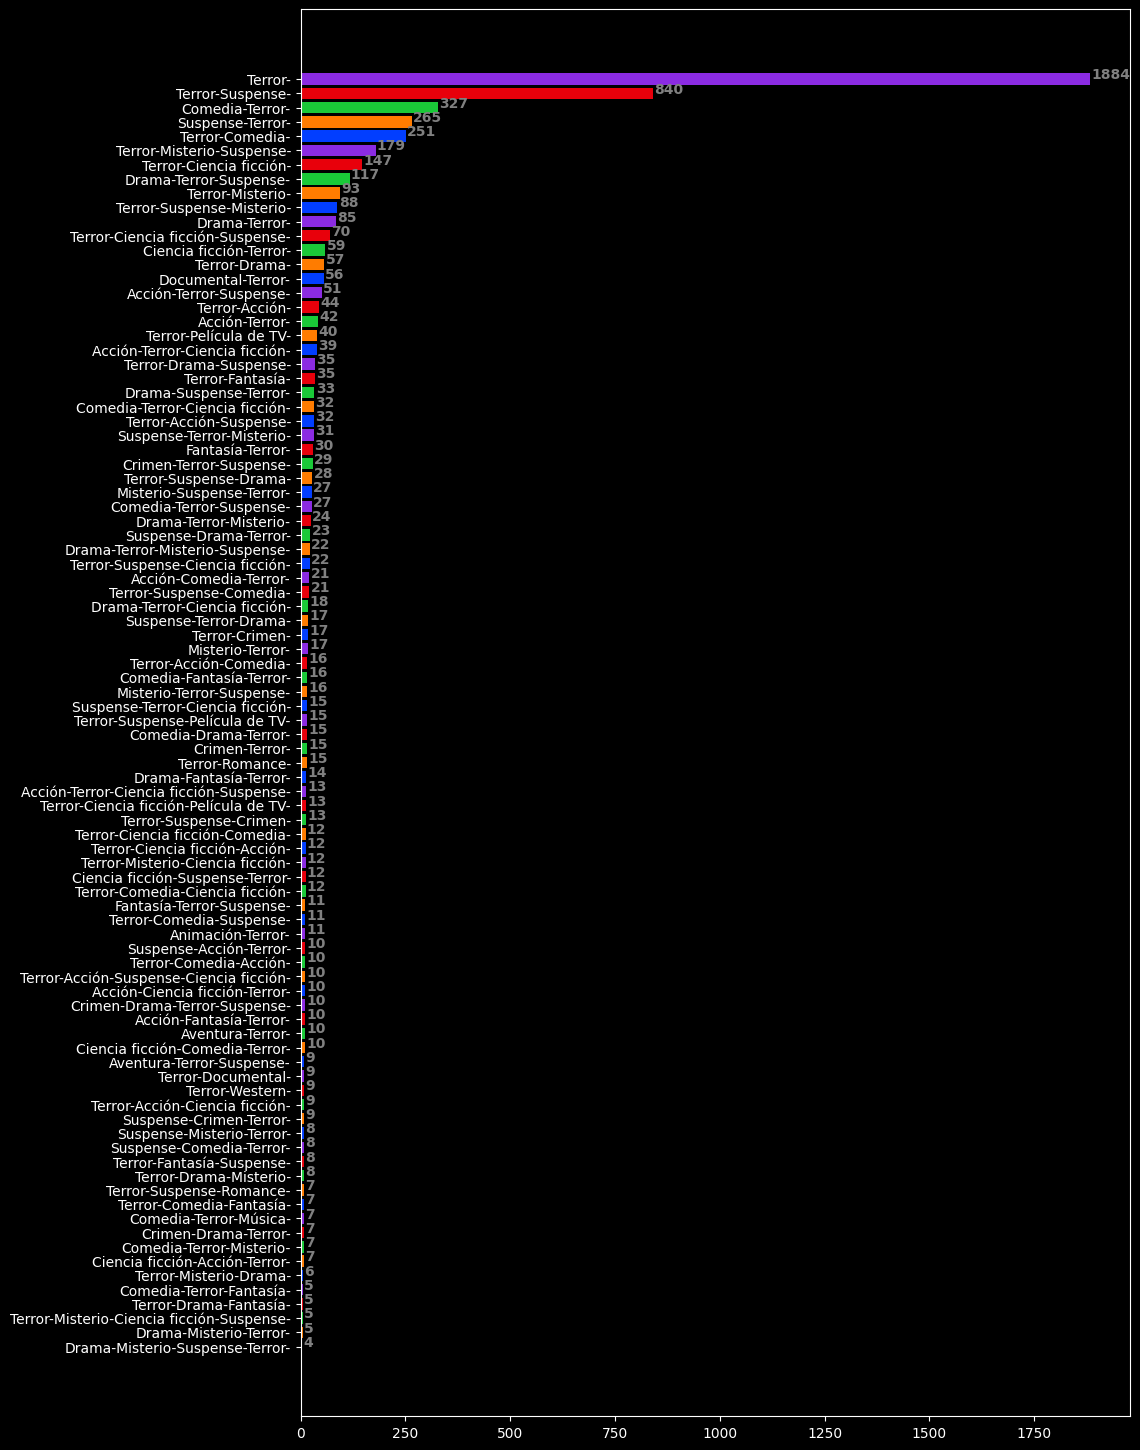

In [88]:
a3_dims = (10.7, 18.27)
fig, ax = plt.subplots(figsize=a3_dims)
colors = sns.color_palette('bright')[0:5]

rev = dfTerrorGenresFilter.genre_list.value_counts().index.to_list()[::-1]
labels = [getLabels(x) for x in dfTerrorGenresFilter.genre_list.value_counts().index.to_list()]
for i, v in enumerate(dfTerrorGenresFilter.genre_list.value_counts(ascending=True)):
    ax.text(v + 3, i + .025, str(v),
            color = 'grey', fontweight = 'bold')
plt.barh(data = dfTerrorGenresFilter.iloc[:,8:], width=dfTerrorGenresFilter.genre_list.value_counts(ascending=True), y = labels[::-1], color= colors );

In [89]:
len(dfTerrorGenresFilter[dfTerrorGenresFilter["val_count"]>150].genre_ids.unique())

9

In [90]:
dfTerrorGenresFilter[dfTerrorGenresFilter["val_count"]>150].genre_list.value_counts(ascending=True)

[27, 9648]          93
[18, 27, 53]       117
[27, 878]          147
[27, 9648, 53]     179
[27, 35]           251
[53, 27]           265
[35, 27]           327
[27, 53]           840
[27]              1884
Name: genre_list, dtype: int64

In [91]:
dfTerrorGenresFilter["val_count"].max()

2571

In [92]:
#dfTerrorGenresFilter.drop("Terror", axis=1)

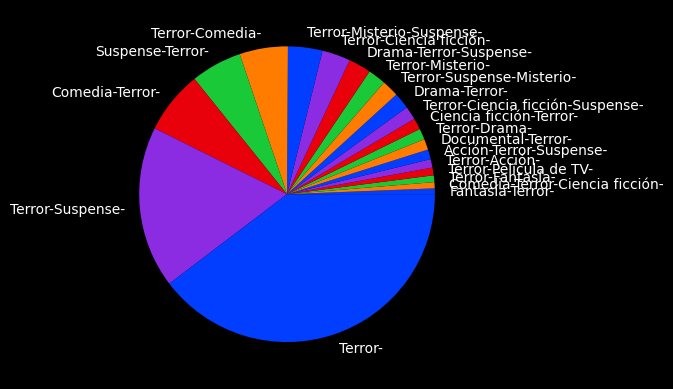

In [93]:
colors = sns.color_palette('bright')[0:5]

data = dfTerrorGenresFilter[dfTerrorGenresFilter["val_count"]>50]
labels = [getLabels(x) for x in data.genre_list.value_counts().index.to_list()]
plt.pie(data = data, x=data.genre_list.value_counts(ascending=True), labels = labels[::-1], colors= colors );

In [94]:
comediaPorMes = dfTerrorGenresConcat.groupby(dfTerrorGenresConcat.release_date.dt.month)["Comedia"].sum()
dfComediaPorMes = pd.DataFrame(data=comediaPorMes)

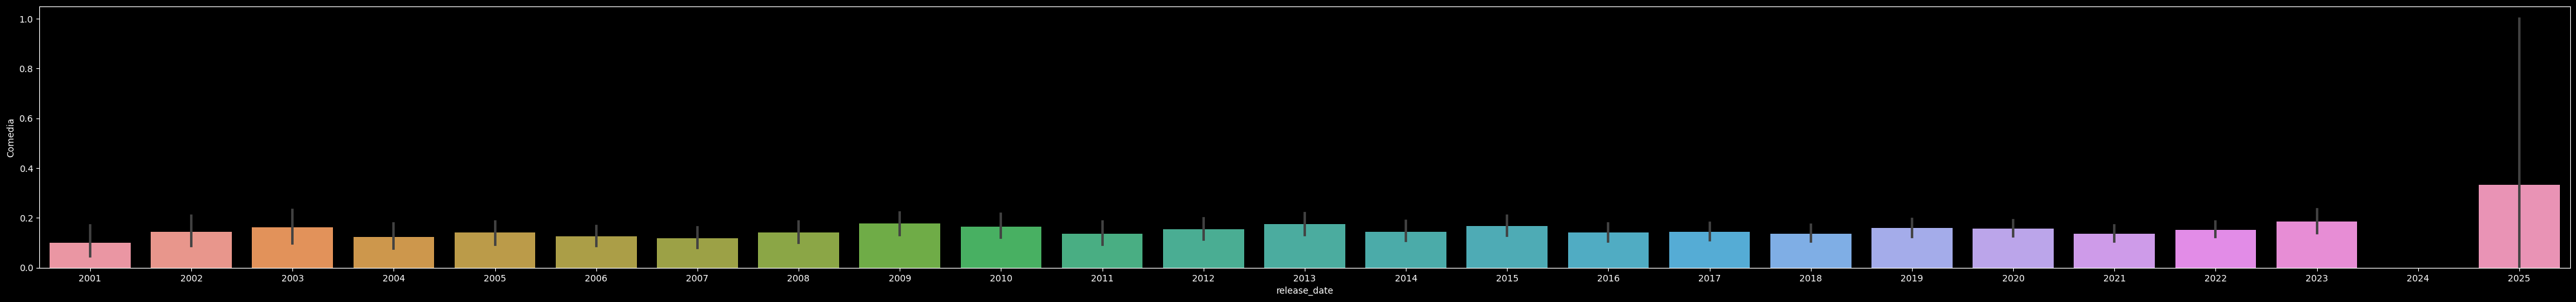

In [95]:
a3_dims = (50.7, 5.27)
fig, ax = plt.subplots(figsize=a3_dims)
sns.barplot(data=dfTerrorGenresConcat, x=dfTerrorGenresConcat.release_date.dt.year, y="Comedia");

<AxesSubplot: xlabel='release_date', ylabel='Comedia'>

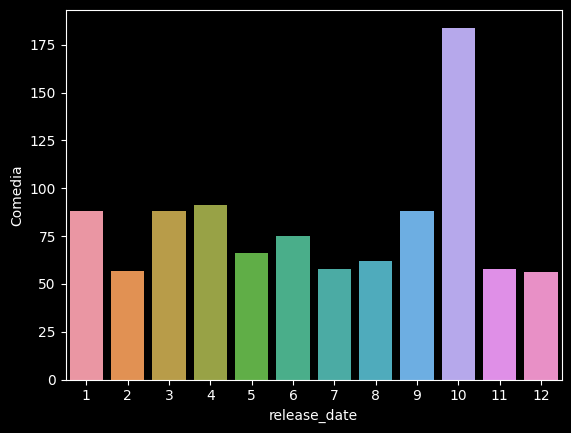

In [96]:
#terror -comedia por meses
sns.barplot(data=dfComediaPorMes, x=dfComediaPorMes.index, y="Comedia")

In [97]:
recientes = dfTerrorGenresConcat[dfTerrorGenresConcat["release_date"].dt.year > 2015]


In [98]:
import datetime
dfTerrorGenresConcat["reciente"] = [(datetime.datetime.now().year - x) for x in dfTerrorGenres['release_date'].dt.year]

In [99]:
dfTerrorGenresConcat.to_csv("../data/clean_dataset_terror_movies.csv")